In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

%matplotlib notebook


In [4]:

from numpy import linalg as LA
import os
import glob

# Load H2S Transmission

In [52]:
epsilon=2.504e15  #1/(ppm meter)
CL=1000 #ppm meter


#H2S
H2S = pd.read_excel ("C:/Users/user/Desktop/UV Spectrum/H2S.xlsx")
H2S_e=(H2S).to_numpy()
H2S_e.shape
WL_H2S=H2S_e[:,0]
H2S_abs=abs(H2S_e[:,1])  # cm^2/mol


# figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# plt.title("H2S") 
# plt.xlabel("Wavelength[nm]") 
# plt.ylabel("Transmission") 
# #plt.plot(WL2,H2S_abs)
# plt.plot(WL_H2S[0:15000],np.exp(-H2S_abs*epsilon*0)[0:15000],label='0 ppm meter')
# plt.plot(WL_H2S[0:15000],np.exp(-H2S_abs*epsilon*1)[0:15000],label='10 ppm meter')
# plt.plot(WL_H2S[0:15000],np.exp(-H2S_abs*epsilon*6)[0:15000],label='60 ppm meter')
# plt.plot(WL_H2S[0:15000],np.exp(-H2S_abs*epsilon*10)[0:15000],label='100 ppm meter')
# #plt.plot(WL_H2S,np.exp(-H2S_abs*epsilon*10000),label='10000 ppm meter')

# plt.legend(loc="lower right")

#H2S
# H2S = pd.read_excel ("C:/Users/user/Desktop/UV Spectrum/H2S.xlsx")
# H2S_e=(H2S).to_numpy()
# H2S_e.shape
# WL_H2S=H2S_e[:15000,0]
# H2S_abs=abs(H2S_e[:15000,1])  # cm^2/mol



# figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# plt.title("H2S") 
# plt.xlabel("Wavelength[nm]") 
# plt.ylabel("Absorption[cm^2/molecule]") 
# plt.plot(WL_H2S,H2S_abs)
# plt.show()

#Insert spectrums
spec2=H2S_abs.astype(np.float64)


# Insert vector wavelength 
WL2=WL_H2S.astype(np.float64)


# Insert number of spectrums

NOS=1

wl=WL2.astype(np.float64)

# Common wavelength range
NOS=1
range_v=np.zeros((NOS,2))

for i in range(NOS):
    range_v[i,1]=globals()[("WL"+str(i+2))][globals()[("WL"+str(i+2))].size-1]
    range_v[i,0]=globals()[("WL"+str(i+2))][0]
    
# Finding minimal and maximal wavelenths
min_range=200 #np.max(range_v[:,0])
max_range=300#np.min(range_v[:,1])

# Gas Cells measurments

In [55]:
# Concentrations 
conc_min=int(0)
conc_max=int(3000)
conc_res=1
conc_N=int((conc_max-conc_min)/conc_res)
Conc_vec=np.linspace(conc_min,conc_max,conc_N)
Conc_vec.size
#Days_vec=['Monday','Tuesday','Wednesday','Thursday', 'Monday 2','Tuesday 2','Wednesday 2','Thursday 2','Sunday']
Days_vec=['05/03/24','10/03/24']
#Days_vec=['12mg','3mg']
#Days_vec=['Sun','Mon','Tus','Wed']


astart=0
aend=15000

#path ='C:\\Users\\user\\Desktop\\GasChamber\\new\\conc'
#path ='C:\\Users\\user\\Desktop\\GasChamber\\compare12mg'
#path ='C:\\Users\\user\\Desktop\\GasChamber\\new_eltan'
path='C:/Users/user/Desktop/CELLS/cells check/H2S 6000'

xsls_files = glob.glob(os.path.join(path, "*.xlsx"))

df = pd.read_excel(xsls_files[0])
t=(df).to_numpy()
T_EXP_ARR=np.zeros((len(xsls_files),t.shape[1]-3))

(xsls_files)

['C:/Users/user/Desktop/CELLS/cells check/H2S 6000\\600.xlsx',
 'C:/Users/user/Desktop/CELLS/cells check/H2S 6000\\600B.xlsx']

# Interpolation

<IPython.core.display.Javascript object>


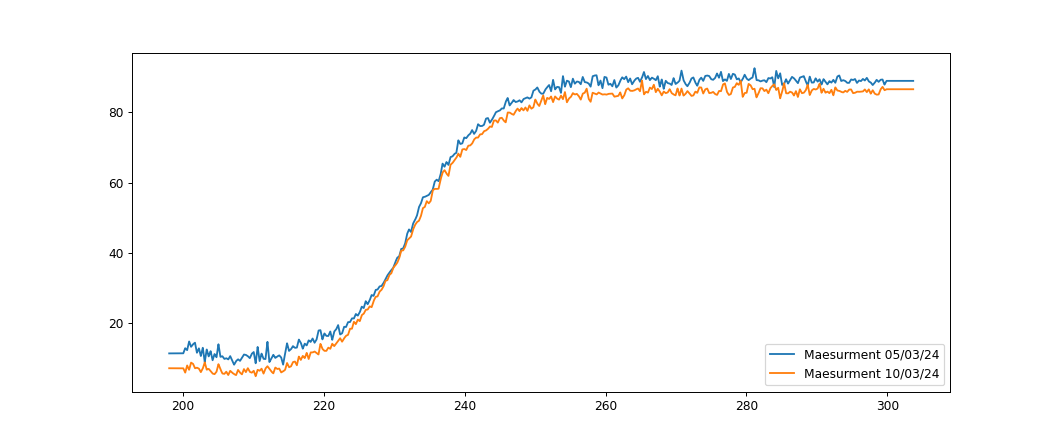

In [59]:
j=0
for f in xsls_files:
    df = pd.read_excel(f)
    t=(df).to_numpy()
    wl=t[0,3:]
    spec=np.zeros(t.shape[1]-3)
    for i in range (t.shape[1]-3):
        spec[i]=np.median(t[1:,i+3])
    
    T_EXP_ARR[j,:]=spec
    j=j+1
#Find min and max range

WL=wl.astype(np.float64)
WL=wl
#flash1=spec1/100
end1=WL.size-1
Thresh1=0.2

for x in range(end1):
    if abs(WL[x]-min_range)<=Thresh1:
        min1=x
    if abs(WL[x]-max_range)<=Thresh1:
        max1=x
        
WL1=WL[min1:max1]
WL1.size
NT_EXP_ARR=np.zeros((len(xsls_files),WL1.size))

for i in range(len(xsls_files)):

    NT_EXP_ARR[i,:]=T_EXP_ARR[i,min1:max1].astype(float)
    
# Interpolation
INT_EXP_ARR=np.zeros((len(xsls_files),WL2.size))

for i in range(len(xsls_files)):

    INT_EXP_ARR[i,:]=np.interp(WL2.astype(float),WL1.astype(float),T_EXP_ARR[i,min1:max1].astype(float))

    
# Plot
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')

for i in range(len(xsls_files)):
    plt.plot(WL2,INT_EXP_ARR[i,:],label='Maesurment '+Days_vec[i])
plt.legend(loc="lower right")

<IPython.core.display.Javascript object>


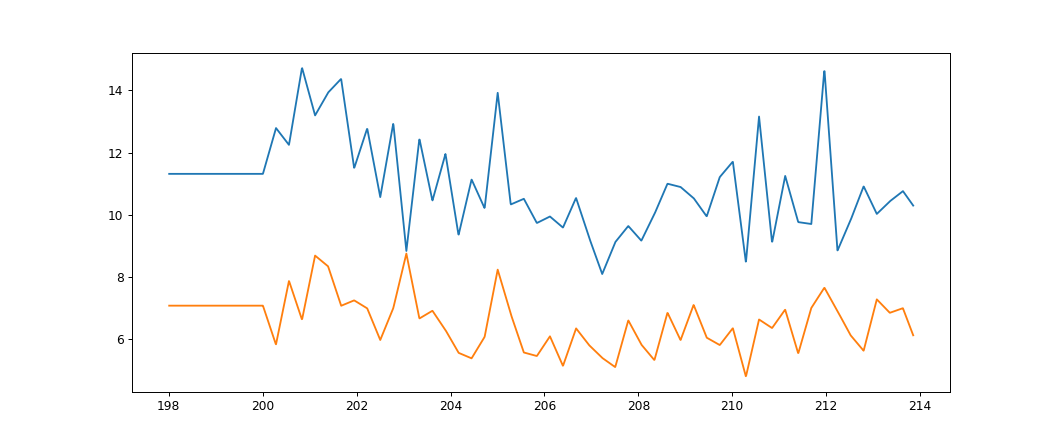

In [60]:
# Normalize Transmission spectrum- Finding noralize constants for each spectrum
siz=int(0.15*WL2.size)

# Minimum constants
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
min_array=np.zeros(len(xsls_files))

for i in range(len(xsls_files)):
    min_array[i]=np.median(INT_EXP_ARR[i,0:siz])
    plt.plot(WL2[0:siz],INT_EXP_ARR[i,0:siz])

<IPython.core.display.Javascript object>


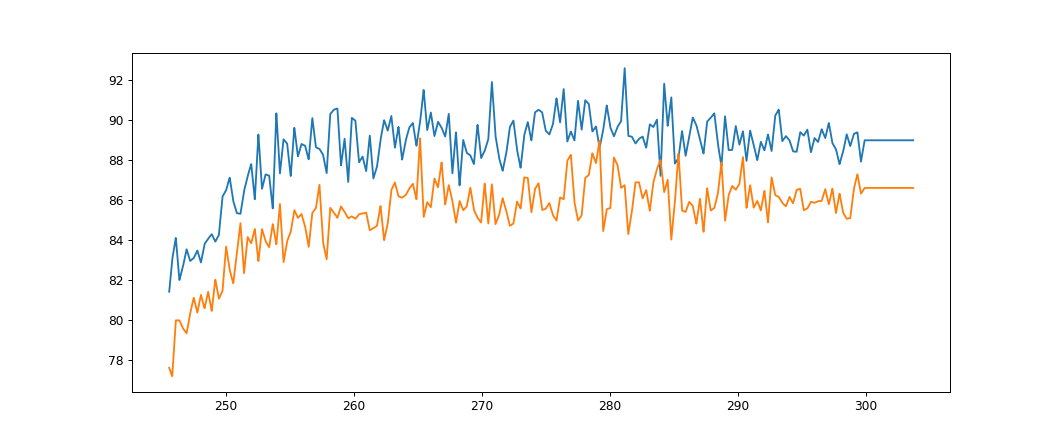

In [61]:
# Maximum constants
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
max_array=np.zeros(len(xsls_files))

for i in range(len(xsls_files)):
    plt.plot(WL2[3*siz:WL2.size],INT_EXP_ARR[i,3*siz:WL2.size])
    max_array[i]=np.average(INT_EXP_ARR[i,3*siz:WL2.size])
#max_array

<IPython.core.display.Javascript object>


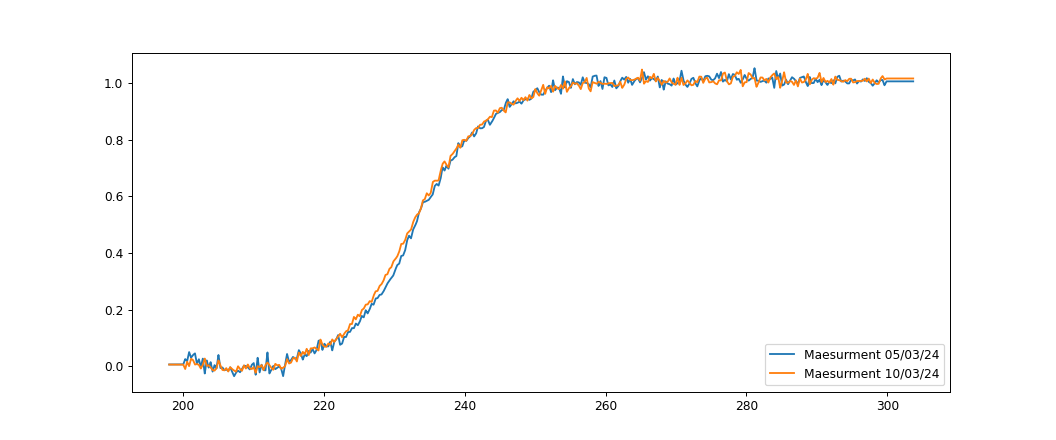

In [68]:
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
NINT_EXP_ARR=np.zeros((len(xsls_files),WL2.size))
for i in range(len(xsls_files)):
    plt.plot(WL2,(INT_EXP_ARR[i,:]-min_array[i])/(max_array[i]-min_array[i]),label='Maesurment '+Days_vec[i])

plt.legend(loc="lower right")

<IPython.core.display.Javascript object>


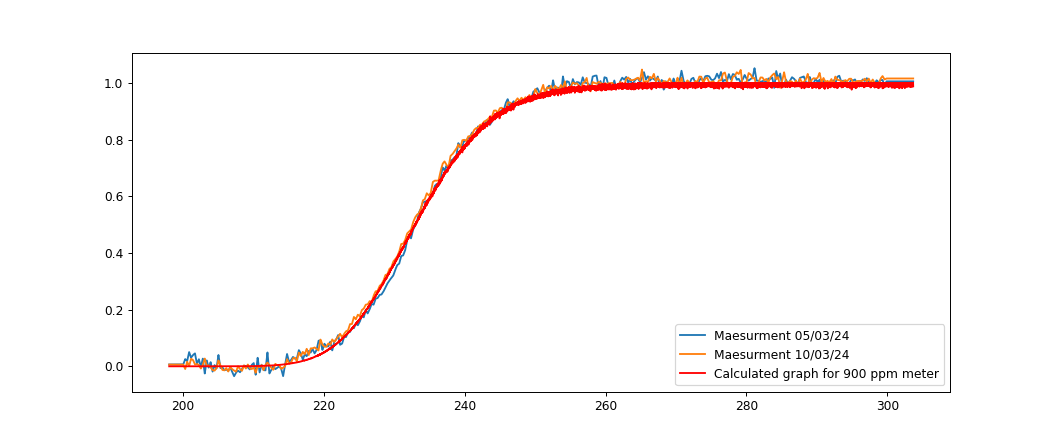

In [71]:
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
NINT_EXP_ARR=np.zeros((len(xsls_files),WL2.size))
for i in range(len(xsls_files)):
    NINT_EXP_ARR[i,:]=(INT_EXP_ARR[i,:]-min_array[i])/(max_array[i]-min_array[i])
    plt.plot(WL2,(INT_EXP_ARR[i,:]-min_array[i])/(max_array[i]-min_array[i]),label='Maesurment '+Days_vec[i])
    
ppmm=900
plt.plot(WL2[astart:aend], np.exp(-H2S_abs*ppmm*epsilon)[astart:aend],label='Calculated graph for '+str(ppmm)+' ppm meter',color='r')
plt.legend(loc="lower right")

In [51]:
Conc_vec.size

3000

# Calculate Gas Concentration

<IPython.core.display.Javascript object>


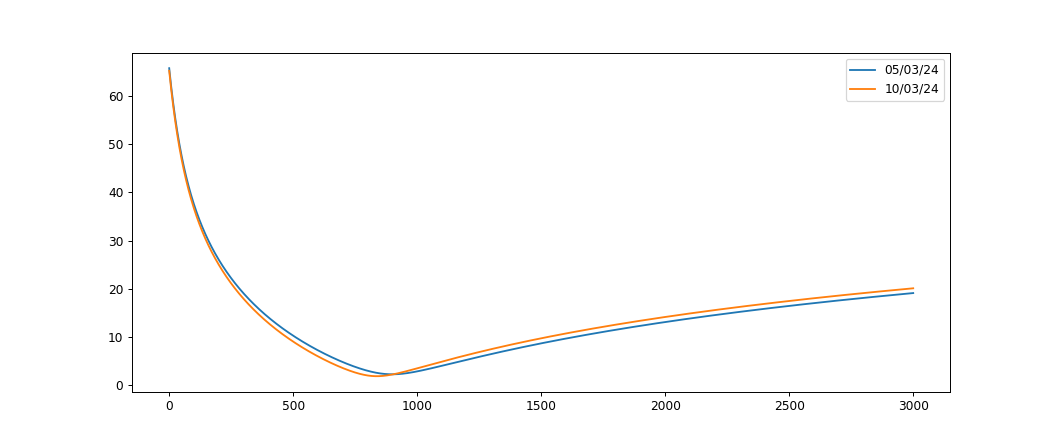

C:\Users\user\AppData\Local\Temp\ipykernel_17516\475225666.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Concentration[j]=Conc_vec[np.where(RMS_VEC == RMS_VEC.min())]


array([899.29976659, 837.27909303])

In [72]:
Concentration=np.zeros(len(xsls_files))
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
for j in range(len(xsls_files)):
    RMS_VEC=np.zeros(Conc_vec.size)

    for i in range (Conc_vec.size):
        #T_SIM=np.exp(-Conc_vec[i]*epsilon*spec_interp2)[astart:aend]
        T_SIM=np.exp(-Conc_vec[i]*epsilon*spec2)[astart:aend]
        RMS_VEC[i]=np.linalg.norm(NINT_EXP_ARR[j,:]-T_SIM)
    
    plt.plot(Conc_vec,RMS_VEC,label=Days_vec[j])
    Concentration[j]=Conc_vec[np.where(RMS_VEC == RMS_VEC.min())]
plt.legend(loc="upper right")

Concentration